In [1]:
!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.1/78.2 GB disk)


In [2]:
from ultralytics import YOLO

from IPython.display import display, Image

In [3]:
# !pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="DEoBuEEO6Rsg26el1WeM")
# project = rf.workspace("mit-wpu-3jmcg").project("lane-detection-vxwns")
# dataset = project.version(2).download("yolov8")

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="DEoBuEEO6Rsg26el1WeM")
project = rf.workspace("mit-wpu-3jmcg").project("lane-detection-vxwns")
dataset = project.version(3).download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.6 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstalle

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.28, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to Lane-Detection-3 in yolov8:: 100%|██████████| 17518/17518 [00:03<00:00, 4381.46it/s]


In [4]:
!yolo task=segment mode=train model=yolov8m-seg.pt data={dataset.location}/data.yaml epochs=30 imgsz=640

100% 52.4M/52.4M [00:00<00:00, 295MB/s]
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8m-seg.pt, data=/content/Lane-Detection-3/data.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=Fa

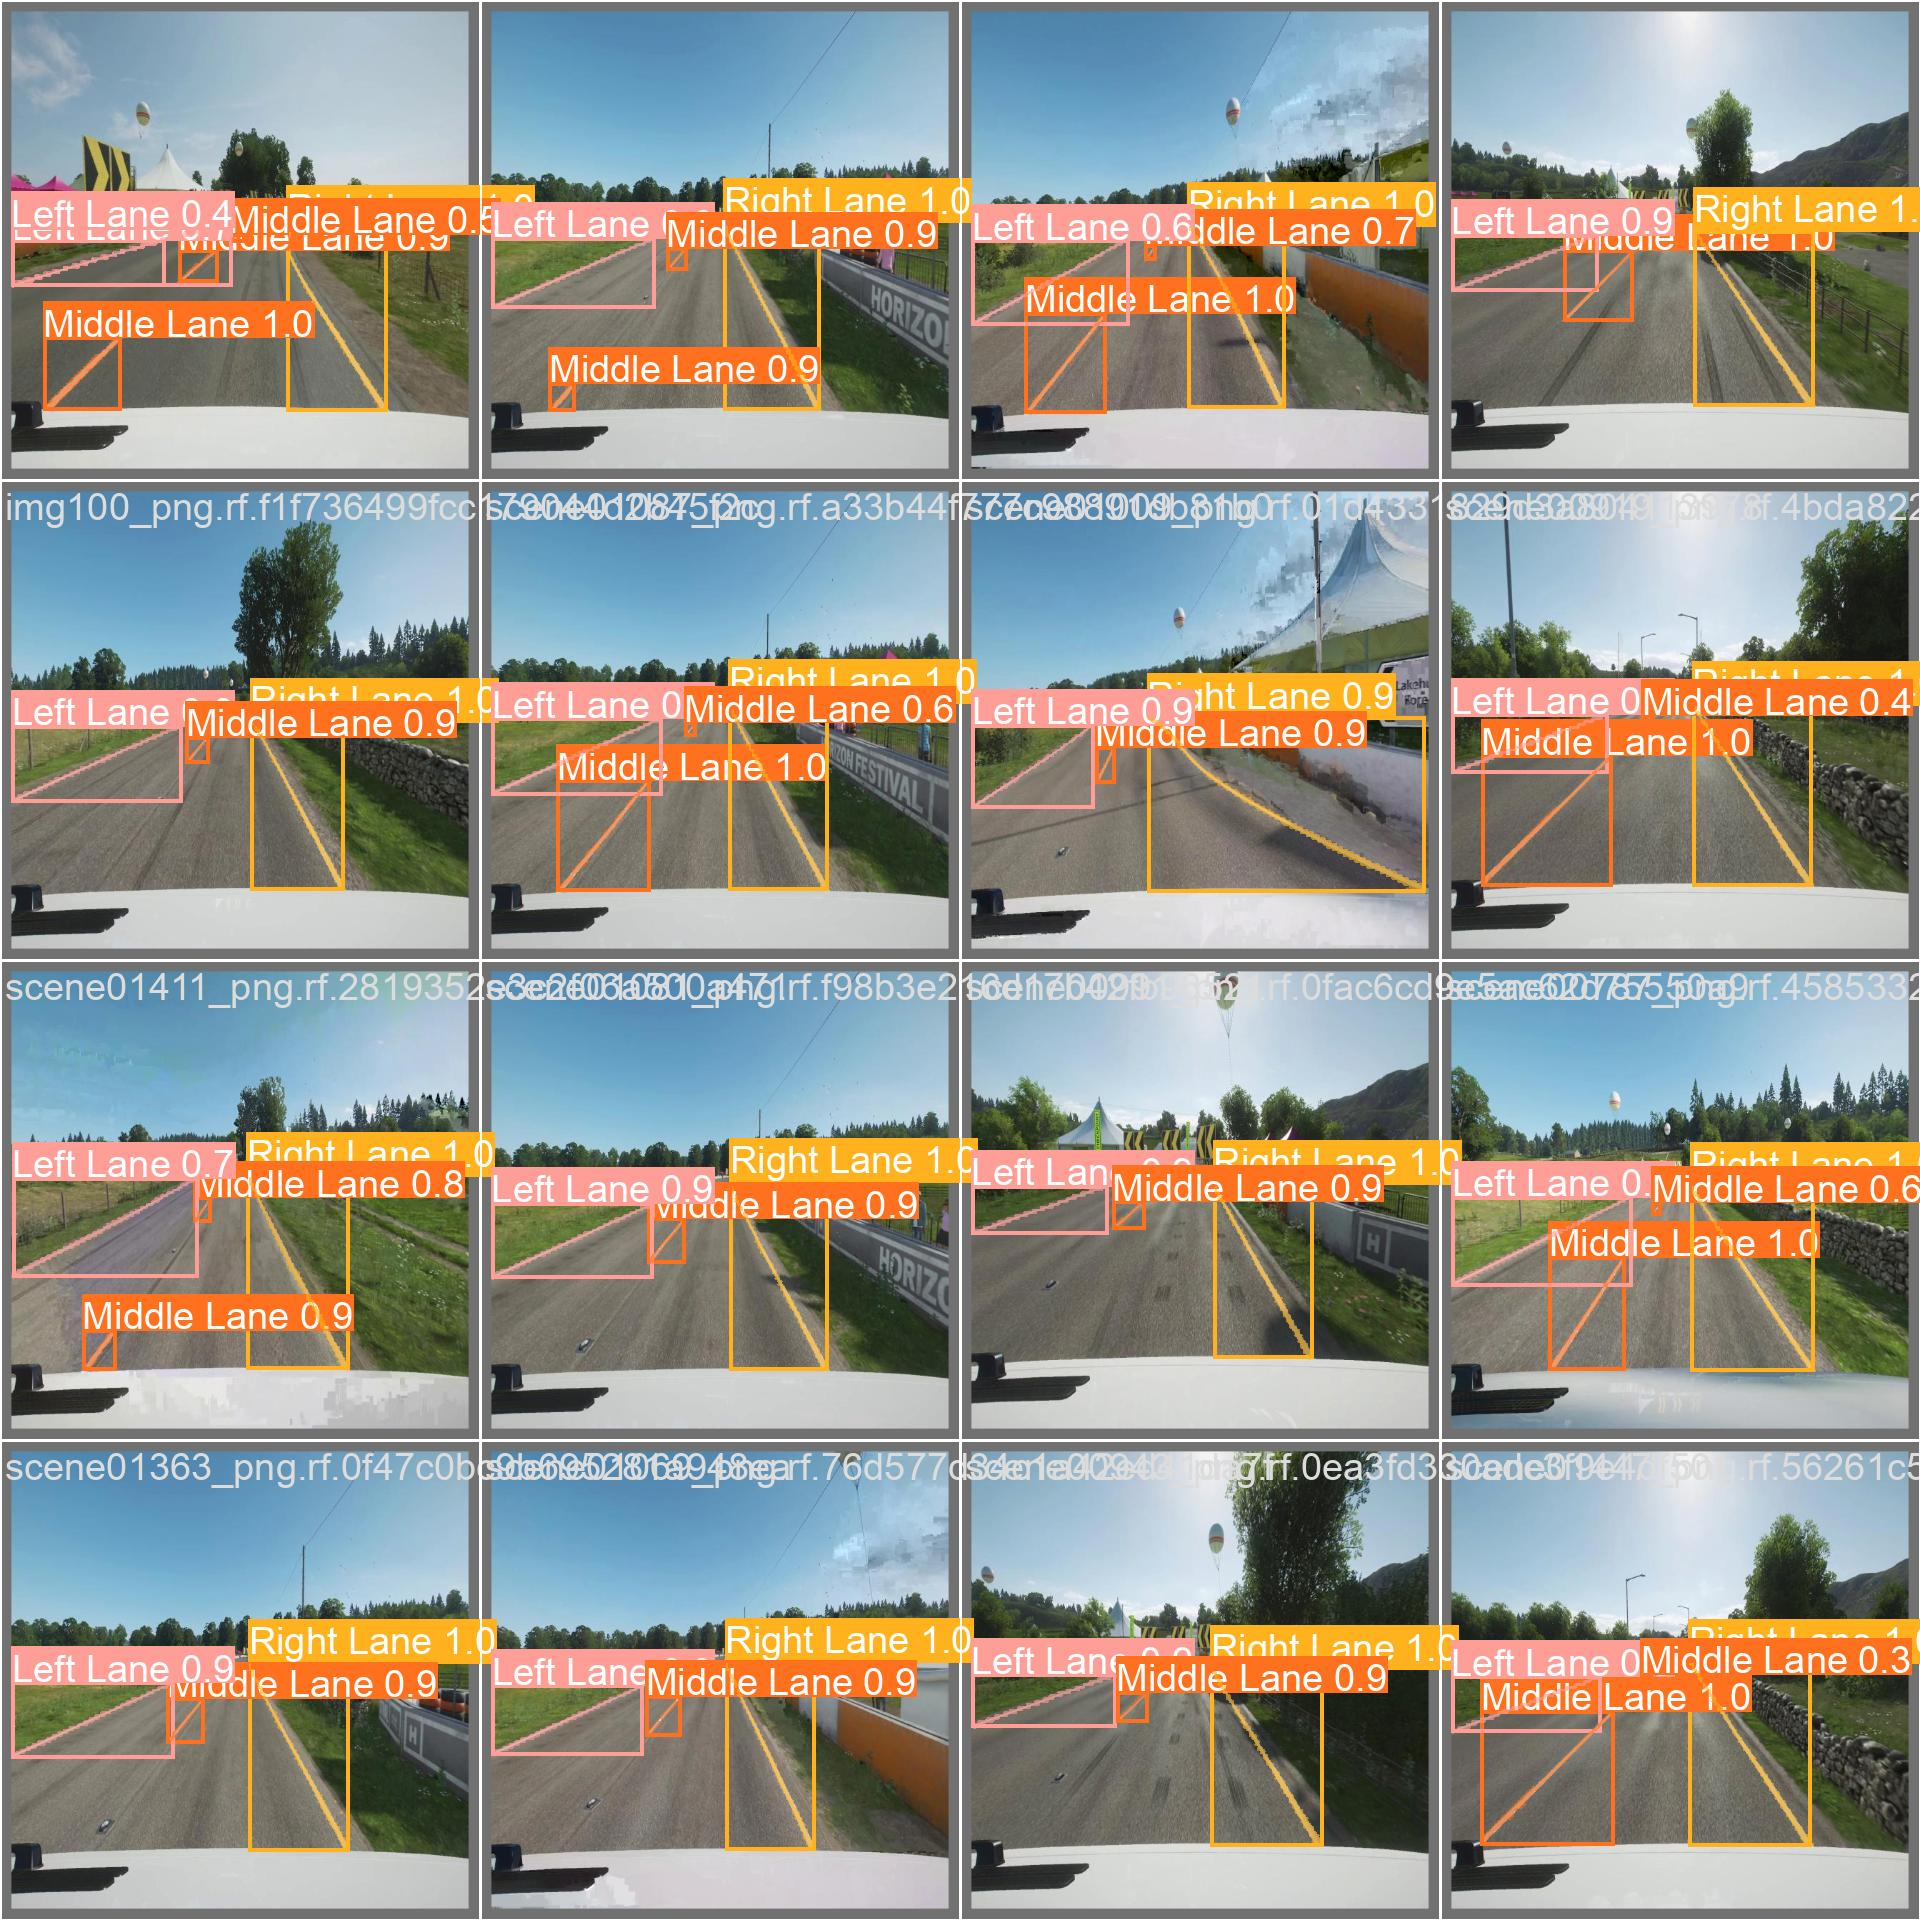

In [5]:
Image(filename=f'/content/runs/segment/train/val_batch0_pred.jpg', width=600)

In [6]:
!yolo task=segment mode=val model=/content/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

2023-10-23 19:43:33.230874: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-23 19:43:34.338788: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27224700 parameters, 0 gradients, 110.0 GFLOPs
val: Scanning /content/Lane-Detection-3/valid/labels.cache... 513 images, 0 backgrounds, 0 corrupt: 100% 513/513 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 33/33 [00:24<00:00,  1.35it/s]
                   all        513       2057      0.914      0.825      0.881      0.719 

In [ ]:
import cv2
import numpy as np

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
!yolo task=segment mode=predict model=/content/runs/segment/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/Data_testing_Video/Final_test_01.mp4

Streaming output truncated to the last 5000 lines.
video 1/1 (1651/6648) /content/drive/MyDrive/Data_testing_Video/Final_test_01.mp4: 384x640 1 Left Lane, 1 Middle Lane, 1 Right Lane, 20.9ms
video 1/1 (1652/6648) /content/drive/MyDrive/Data_testing_Video/Final_test_01.mp4: 384x640 1 Left Lane, 1 Middle Lane, 1 Right Lane, 25.6ms
video 1/1 (1653/6648) /content/drive/MyDrive/Data_testing_Video/Final_test_01.mp4: 384x640 2 Left Lanes, 1 Middle Lane, 1 Right Lane, 20.7ms
video 1/1 (1654/6648) /content/drive/MyDrive/Data_testing_Video/Final_test_01.mp4: 384x640 1 Left Lane, 2 Middle Lanes, 1 Right Lane, 20.6ms
video 1/1 (1655/6648) /content/drive/MyDrive/Data_testing_Video/Final_test_01.mp4: 384x640 1 Left Lane, 2 Middle Lanes, 1 Right Lane, 20.6ms
video 1/1 (1656/6648) /content/drive/MyDrive/Data_testing_Video/Final_test_01.mp4: 384x640 1 Left Lane, 2 Middle Lanes, 1 Right Lane, 20.7ms
video 1/1 (1657/6648) /content/drive/MyDrive/Data_testing_Video/Final_test_01.mp4: 384x640 1 Left Lane, 2